Analisis de datos

Tarea 4 - Algoritmos de Aprendizaje no Supervisado

Presentado por:

Deibin Andrey Rojas Tellez

Grupo: 55

Tutor: Sandra M. Patiño

UNIVERSIDAD NACIONAL ABIERTA Y A DISTANCIA

Noviembre - 2024

* Agrupamiento Hierarchical Clustering

1. Realizar un análisis exploratorio de los datos para identificar 
relaciones entre variables, valores atípicos, tendencias, etc.  
2. Preprocesar los datos limpiándolos, tratando valores faltantes y 
transformándolos según sea necesario.  
3. Seleccionar las características más relevantes para entrenar el 
modelo utilizando selección de características. 
4. Entrenar el modelo configurando los diferentes 
hiperparámetros. 
5. Evaluar el desempeño del modelo con métricas como 
Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc. 
6. Realizar las diferentes gráficas que permitan visualizar los 
resultados del modelo 
7. Interpretar, analizar y documentar los resultados obtenidos.  

1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [6]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones


# librerías de para implementar modelo Kmeans
from sklearn.cluster import AgglomerativeClustering #algoritmos de agrupamiento o clustering, dividir datos en grupos o clusters basados en su similitud.
from sklearn.preprocessing import StandardScaler #escalar o normalizar los datos 
from scipy.cluster.hierarchy import linkage, dendrogram #herramientas para realizar agrupamiento jerárquico y visualización de dendrogramas.
#dendrogram:  genera un gráfico de árbol 

# librerías de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from datetime import datetime

#Librería para evitar la advertencia de que el modelo tiene una pérdida de memoria en Windows 
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Cargar el conjunto de datos en la variable data
df = pd.read_csv('Mall_Customers.csv')

In [10]:
df.head(40)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


Objetivo: Identificar grupos de clientes con patrones similares en ingresos, edad y gasto.

- CustomerID: Identificador único del cliente 
- Gender: Género del cliente 
- Age: Edad del cliente.
- Annual Income (k$): Ingreso anual 
- Spending Score (1-100): Puntaje de gasto

In [12]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [16]:
# Obtener información sobre el tipo de datos y el total de valores en cada columna
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

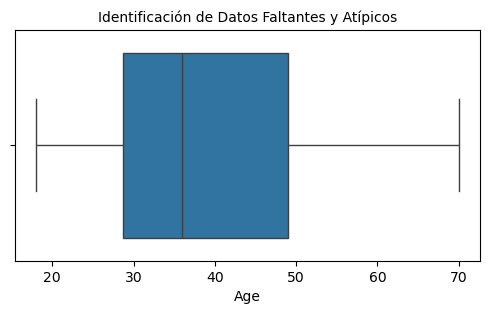

In [25]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=df['Age'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

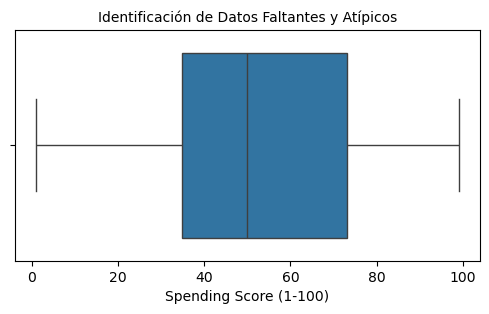

In [27]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=df['Spending Score (1-100)'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

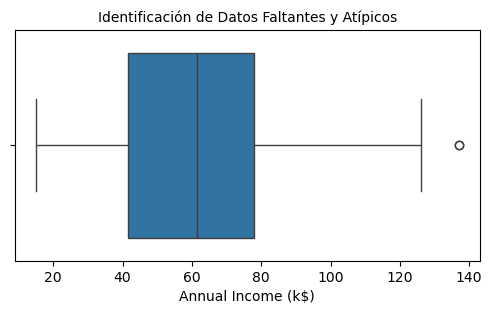

In [29]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=df['Annual Income (k$)'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.  

In [33]:
# Identificar columnas con datos faltantes
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


No se encontraron datos faltantes

In [38]:
# Reemplazar valores de genero a numericos
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})

In [41]:
# Reemplazar todos los ceros con el valor medio (promedio) 
df['Annual Income (k$)']=df['Annual Income (k$)'].replace(0,df['Annual Income (k$)'].mean())

In [43]:
#Conteo de Datos Atípicos
nivel_minimo=0
nivel_maximo=100
Total_Atipicos=((df['Annual Income (k$)']<nivel_minimo)|(df['Annual Income (k$)']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 14


In [45]:
# Filtra Datos Atípicos

df=df[(df['Annual Income (k$)']<nivel_maximo)&(df['Annual Income (k$)']>nivel_minimo)]

In [47]:
# Verificar los resultados
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1       0   19                  15                      39
1           2       0   21                  15                      81
2           3       1   20                  16                       6
3           4       1   23                  16                      77
4           5       1   31                  17                      40


In [51]:
#Revisión del tipo de datos y datos faltantes

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186 entries, 0 to 185
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              186 non-null    int64
 1   Gender                  186 non-null    int64
 2   Age                     186 non-null    int64
 3   Annual Income (k$)      186 non-null    int64
 4   Spending Score (1-100)  186 non-null    int64
dtypes: int64(5)
memory usage: 8.7 KB


3. Seleccionar las características más relevantes para entrenar el  modelo utilizando selección de características. 

* Age: Puede influir en los hábitos de consumo.
* Annual Income (k$): Determina la capacidad adquisitiva del cliente.
* Spending Score (1-100): Refleja el comportamiento real de gasto.

In [54]:
# Filtrar columnas del modelo 
df = df[["Age","Annual Income (k$)","Spending Score (1-100)"]]

In [56]:
df.head(40)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


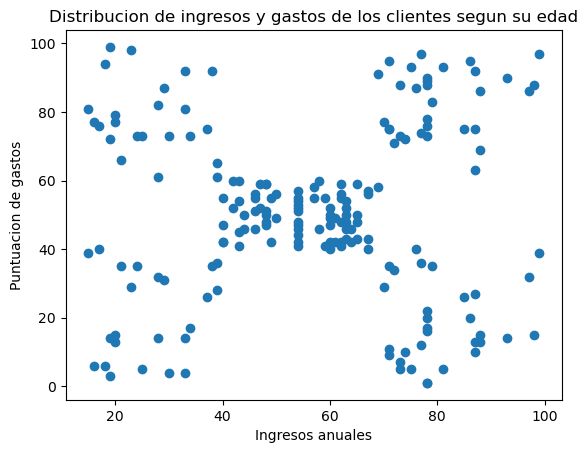

In [60]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Ingresos anuales')
plt.ylabel('Puntuacion de gastos')
plt.title('Distribucion de ingresos y gastos de los clientes segun su edad')
plt.show()

4. Entrenar el modelo configurando los diferentes hiperparámetros. 

In [67]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

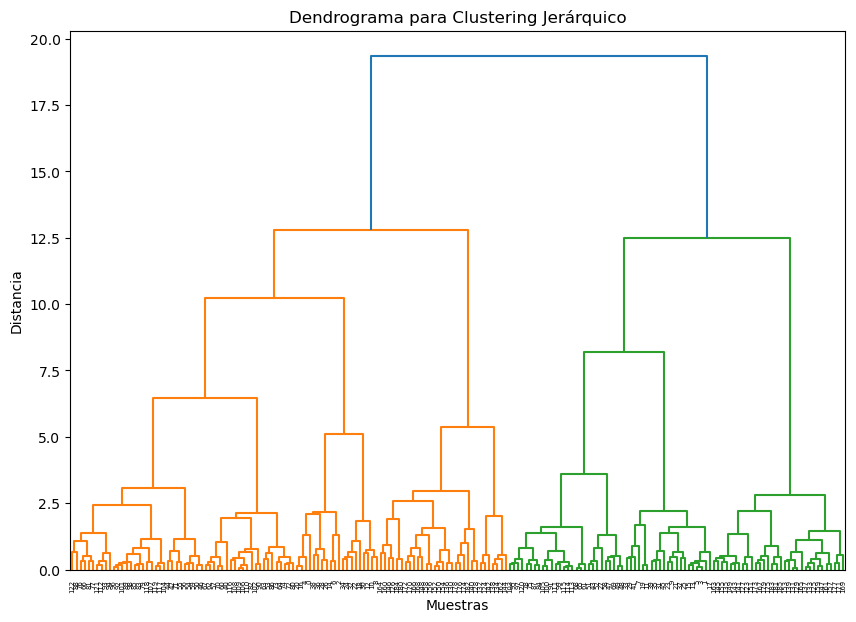

In [69]:
# Check for and handle non-finite values in scaled_data
scaled_data = np.nan_to_num(scaled_data)  # Reemplaza valores NaN, inf y -inf con valores finitos

# Continue with hierarchical clustering
linked = linkage(scaled_data, method='ward') # Realiza el enlace jerárquico con el método de Ward

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False) # Dibuja el dendrograma
plt.title('Dendrograma para Clustering Jerárquico')
plt.xlabel('Muestras')
plt.ylabel('Distancia')
plt.show()

 5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc. 

In [73]:
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].fillna(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean())

# Preprocesamiento de los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])  

# Entrenamiento del modelo de Clustering Jerárquico
model = AgglomerativeClustering(n_clusters=3, linkage='ward')  
labels = model.fit_predict(scaled_data)

# Evaluación del modelo

# Coeficiente de Silhouette
sil_score = silhouette_score(scaled_data, labels)
print(f"Coeficiente de Silhouette: {sil_score}")

# Índice de Calinski-Harabasz
ch_score = calinski_harabasz_score(scaled_data, labels)
print(f"Índice de Calinski-Harabasz: {ch_score}")

# Índice de Davies-Bouldin
db_score = davies_bouldin_score(scaled_data, labels)
print(f"Índice de Davies-Bouldin: {db_score}")

Coeficiente de Silhouette: 0.33213815748086906
Índice de Calinski-Harabasz: 84.90139875046562
Índice de Davies-Bouldin: 1.1305024940373656


6. Realizar las diferentes gráficas que permitan visualizar los 
resultados del modelo 

* Gráfico de Dispersión para Visualización de Clusters

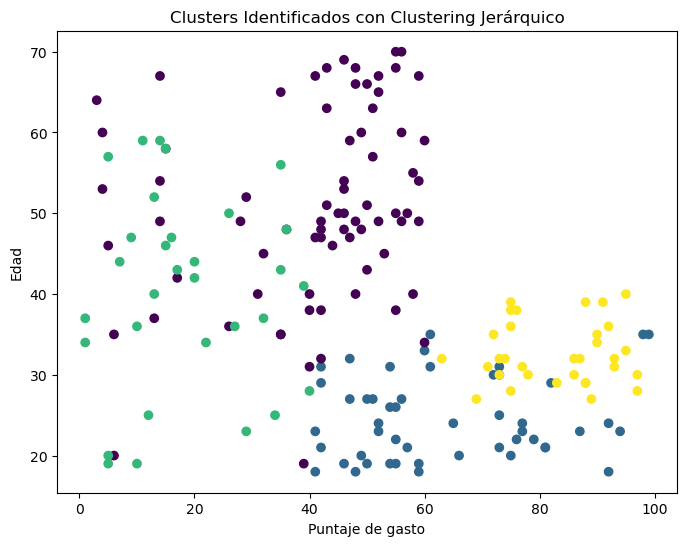

In [104]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Aplicar el modelo de clustering jerárquico
model = AgglomerativeClustering(n_clusters=4)  # Ajustar el número de clusters
df['Cluster'] = model.fit_predict(scaled_data)
# Graficar los clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['Spending Score (1-100)'], df['Age'], c=df['Cluster'], cmap='viridis')
plt.title('Clusters Identificados con Clustering Jerárquico')
plt.xlabel('Puntaje de gasto')
plt.ylabel('Edad')
plt.show()

Aqui podemos observar el puntaje de gasto que tienen las personas por su edad

* Gráfico de Silueta

Silhouette Score: 0.384942917114684


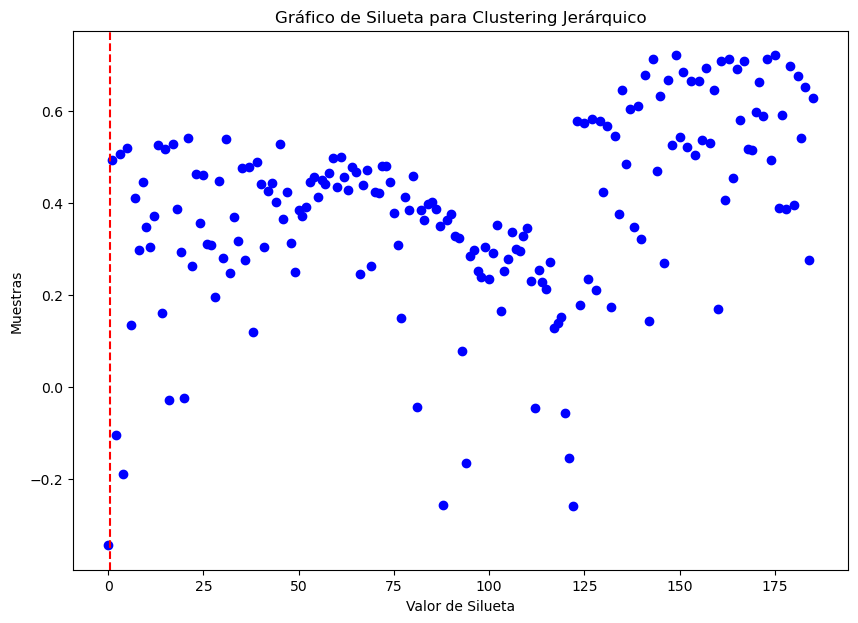

In [109]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt

# Calcular la silueta
silhouette_avg = silhouette_score(scaled_data, model.labels_)
print(f'Silhouette Score: {silhouette_avg}')

# Mostrar el gráfico de silueta
sample_silhouette_values = silhouette_samples(scaled_data, model.labels_)
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(sample_silhouette_values, 'bo')
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_title("Gráfico de Silueta para Clustering Jerárquico")
ax.set_xlabel("Valor de Silueta")
ax.set_ylabel("Muestras")
plt.show()

7. Interpretar, analizar y documentar los resultados obtenidos

En esta actividad /ejercicio hicimos el mismo procedimiento que en k-means limpiamos, encontramos datos atípicos, cambiamos el valor del género a uno numérico, pero implementamos el agrupamiento hierrachical y pudimos obtener la siguiente información. 

* El porcentaje de gasto influye más en la edad que en el ingreso anual ya que sin duda los jóvenes entre 20 a 30 gastan más de lo necesario, esto lo supimos gracias a las gráficas de clousters
  
* En el gráfico de silueta las Silhouettes están mas agrupadas y cercanas a +1, eso nos indica que la mayoría de los puntos están correctamente asignados a su cluster y que los clusters están bien separados
  
* Un valor de 0.3321 de Coeficiente de Silhouette indica que los clusters no están tan bien separados pero no mucho aunque podemos destacar que los puntos dentro de cada cluster están algo agrupados prácticamente este valor indica que la calidad del clustering es moderada.
  
* El índice de Calinski-Harabasz es de 84.90 es bastante bajo, lo que indica que los clusters no son tan compactos ni tan bien separados como sería ideal por lo general, valores más altos (por encima de 300) suelen sugerir una segmentación más efectiva que la obtenida
  
* Davies-Bouldin de 1.1305 indica que los clusters no son perfectamente separados, pero tampoco son excesivamente dispersos o solapados por lo que están aceptablesles
